In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime, DualMap, TimeSliderChoropleth
from IPython.display import HTML, Javascript, IFrame
import branca
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_csv('./data/cleaned_data/final_data.csv')

## Further Cleaning

In [3]:
# change the rcp column to str
df['rcp'] = df['rcp'].astype(str)

### Greenery area dataset

In [4]:
# Greenery data
# extract the relevant data
greenery_columns = ['long', 'lat', 'year', 'rcp', 'treecanopy', 'bare', 'herb', 'ann_herb', 'litter', 'shrub']
greenery = df[greenery_columns]

# calculate the total greenery
greenery['total'] = greenery['treecanopy'] + greenery['herb'] + greenery['ann_herb'] + greenery['shrub'] + greenery['litter'] - greenery['bare'] 

# save the data to csv file
greenery.to_csv('./data/cleaned_data/greenery_data.csv', index=False)

### Plant litter dataset

In [5]:
# Plant litter dataset
# extract the relevant data
litter_columns = ['long', 'lat', 'year', 'rcp', 'litter', 't_winter', 't_summer', 't_annual']
litter = df[litter_columns]
litter = litter.drop_duplicates(subset=litter_columns)

# # fill the null values with the mean
# litter.loc[:, 't_winter'] = litter['t_winter'].fillna(litter['t_winter'].mean())
# litter.loc[:, 't_summer'] = litter['t_summer'].fillna(litter['t_summer'].mean())
# litter.loc[:, 't_annual'] = litter['t_annual'].fillna(litter['t_annual'].mean())

# drop the null values
litter = litter.dropna()

# save the data to csv file
litter.to_csv('./data/cleaned_data/litter_data.csv', index=False)

# litter

### VWC dataset

In [6]:
# VWC data
# extract the relevant data
vwc_columns = ['long', 'lat', 'year', 'rcp', 'evap_summer', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc = df[vwc_columns]

# deal with NaN values
# fill the null values with the mean of the column
null_columns = ['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc.loc[:, null_columns] = vwc[null_columns].fillna(vwc[null_columns].mean())

# save it to a new csv file
vwc.to_csv('./data/cleaned_data/vwc_data.csv', index=False)

### Summer dataset

In [7]:
# summer related data
# extract the relevant data
summer_columns = ['long', 'lat', 'year', 'rcp', 'drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer', 'vwc_summer_whole']
summer = df[summer_columns]

# fill missing values with the mean
summer.loc[:, 'drysoildays_summer_whole'] = summer['drysoildays_summer_whole'].fillna(summer['drysoildays_summer_whole'].mean())
summer.loc[:, 'evap_summer'] = summer['evap_summer'].fillna(summer['evap_summer'].mean())
summer.loc[:, 'nondryswa_summer_whole'] = summer['nondryswa_summer_whole'].fillna(summer['nondryswa_summer_whole'].mean())
summer.loc[:, 'ppt_summer'] = summer['ppt_summer'].fillna(summer['ppt_summer'].mean())
summer.loc[:, 'tmax_summer'] = summer['tmax_summer'].fillna(summer['tmax_summer'].mean())

# round the columns
summer = summer.round({'drysoildays_summer_whole': 3, 'evap_summer': 3, 'nondryswa_summer_whole': 3, 'ppt_summer': 3, 'tmax_summer': 3})

# save the data to csv file
summer.to_csv('./data/cleaned_data/summer_data.csv', index=False)

### Summer vs. Winter dataset

In [8]:
# summer vs. winter data
# extract the relevant data
summer_winter_columns = ['long', 'lat', 'year', 'rcp', 'ppt_annual', 'ppt_summer', 'ppt_winter', 't_summer', 't_winter', 'tmax_summer', 'tmin_winter']
summer_winter = df[summer_winter_columns]

# save the data to csv file
summer_winter.to_csv('./data/cleaned_data/summer_winter_data.csv', index=False)

## Visualization

### Greenery area dataset

In [160]:
# load the data
greenery = pd.read_csv('./data/cleaned_data/greenery_data.csv')

In [161]:
# change the rcp to str
greenery['rcp'] = greenery['rcp'].astype(str)

# group by necessary columns
greenery_temp = greenery.groupby(['long', 'lat', 'year', 'rcp'])['total'].sum().reset_index()

In [162]:
# further data processing
greenery_total = greenery.groupby(['long', 'lat', 'year'])['total'].sum().reset_index()

In [163]:
# filter out the data
data_2018 = greenery_total[greenery_total['year'] == 2018]
data_1980 = greenery_total[greenery_total['year'] == 1980]
data_2024 = greenery_total[greenery_total['year'] == 2024]

In [203]:
latitude_center = greenery_total['lat'].mean()
# latitude_center

In [232]:
# set the map variables
latitude_center = greenery_total['lat'].mean()
longitude_center = greenery_total['long'].mean()
new_latitude_center = latitude_center - 0.004
mean_map_center = [new_latitude_center, longitude_center]
map_width = 500 
map_height = 400 

In [233]:
# create a 1980 map
mymap_1980 = folium.Map(location=mean_map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_1980[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_1980)

# save the map to an html file
mymap_1980.save('./maps/greenery_map_1980.html')
mymap_1980

In [234]:
# create a folium heatmap of the 2020 data
mymap_2018 = folium.Map(location=mean_map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_2018[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_2018)

mymap_2018.save('./maps/greenery_map_2018.html')
mymap_2018

In [235]:
# create a folium heatmap of the 1980 data
mymap_2024 = folium.Map(location=mean_map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_2024[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_2024)
mymap_2024.save('./maps/greenery_map_2024.html')
mymap_2024

### Plant litter dataset

In [428]:
# load the data
litter = pd.read_csv('./data/cleaned_data/litter_data.csv')

In [429]:
# further data processing
litter_copy = litter.copy()
# drop long and lat and rcp columns
litter_copy = litter_copy.drop(columns=['long', 'lat', 'rcp'], axis=1)

# group by year and get the mean of the columns
litter_copy = litter_copy.groupby('year', as_index=False).agg({'litter': lambda x: x.mode().iloc[0], 
                                     't_winter': 'mean', 
                                     't_summer': 'mean', 
                                     't_annual': 'mean'})

# round the columns
litter_copy = litter_copy.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

litter_copy.head()

,year,litter,t_winter,t_summer,t_annual
0,1980,9,0.773,22.816,10.849
1,1981,9,3.239,22.874,10.993
2,1982,6,-0.201,21.620,11.135
3,1983,10,0.243,20.795,9.601
4,1984,6,-1.258,21.462,9.281


In [204]:
litter_copy_2 = litter.copy()
# litter_copy_2

In [433]:
litter_copy_4 = litter.copy()

# drop the unnecessary columns
litter_copy_4 = litter_copy_4.drop(columns=['long', 'lat', 'year'], axis=1)

# filter out the data
litter_4_5 = litter_copy_4[litter_copy_4['rcp'] == '4.5']
litter_8_5 = litter_copy_4[litter_copy_4['rcp'] == '8.5']

In [439]:
litter_4_5 = litter_4_5.groupby(['rcp', 'litter'], as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})
litter_8_5 = litter_8_5.groupby(['rcp', 'litter'], as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})

In [440]:
# plot a line graph
fig = px.scatter(litter_4_5, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [441]:
# plot a line graph
fig = px.scatter(litter_8_5, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [205]:
# drop long and lat and rcp columns
litter_copy_2 = litter_copy_2.drop(columns=['long', 'lat', 'rcp', 'year'], axis=1)

# group by litter column
litter_copy_2 = litter_copy_2.groupby('litter', as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})

# round the columns
litter_copy_2 = litter_copy_2.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

# litter_copy_2

In [291]:
fig = px.scatter(litter_copy_2, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [206]:
litter_copy_hist = litter.copy()
# litter_copy_hist

In [207]:
# filter out the data
litter_hist = litter_copy_hist[litter_copy_hist['rcp'] == 'historical']

# drop unnecessary columns
litter_hist = litter_hist.drop(columns=['long', 'lat', 'year'], axis=1)

# group by the necessary columns
litter_hist = litter_hist.groupby(['rcp', 'litter'])['t_annual'].mean().reset_index()

# round the column
litter_hist = litter_hist.round({'t_annual': 3})

# litter_hist

In [343]:
fig = px.scatter(litter_hist, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

### VWC dataset

In [209]:
# load the data
vwc = pd.read_csv('./data/cleaned_data/vwc_data.csv')
vwc.head()

,long,lat,year,rcp,evap_summer,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
1,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
2,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
3,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
4,-110.0472,37.60413,1980,historical,1.559807,0.113447,0.096831,0.041876,0.052298


In [210]:
# further data cleaning
vwc_melt = pd.melt(vwc, id_vars=['long', 'lat', 'year', 'rcp'], value_vars=['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole'], var_name='season', value_name='vwc')
vwc_grouped = vwc_melt.groupby(['year', 'rcp', 'season']).agg({'vwc': 'mean'}).reset_index()
vwc_grouped = vwc_grouped.round({'vwc': 3})
vwc_grouped['rcp'] = vwc_grouped['rcp'].astype('str')
vwc_grouped.head()
vwc_grouped.to_csv('./data/cleaned_data/vwc_grouped.csv', index=False)

In [211]:
# group by season and get the mean of the columns
vwc_copy = vwc_grouped.copy()

vwc_copy = vwc_copy.groupby(['season', 'rcp'], as_index=False).agg({'vwc': 'mean'}).reset_index(drop=True)
vwc_copy.head()

,season,rcp,vwc
0,vwc_fall_whole,4.5,0.099125
1,vwc_fall_whole,8.5,0.099000
2,vwc_fall_whole,historical,0.094897
3,vwc_spring_whole,4.5,0.118875
4,vwc_spring_whole,8.5,0.119875


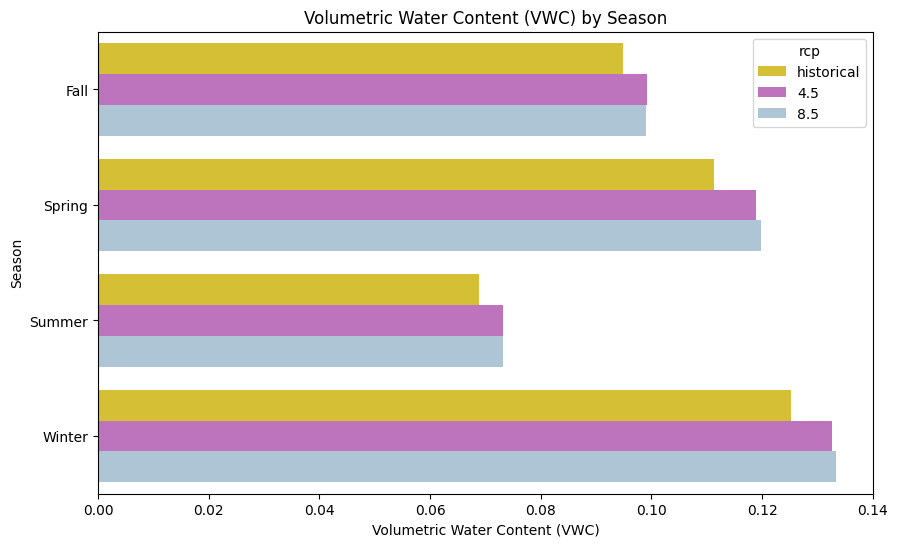

In [212]:
colors = ["#EED21B", "#CA68C8", "#A7C6DA"] 
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vwc_grouped, x="vwc", y="season", hue="rcp", orient="h", errorbar=None)

plt.xlabel("Volumetric Water Content (VWC)")
plt.ylabel("Season")
plt.title("Volumetric Water Content (VWC) by Season")

ax.set_yticklabels(["Fall", "Spring", "Summer", "Winter"])

plt.show()

### Summer dataset

#### First Visualization

In [214]:
# load the data
summer = pd.read_csv('./data/cleaned_data/summer_data.csv')

# further data processing
summer_copy = summer.copy()
summer_copy = summer.drop(['long', 'lat', 'rcp'], axis=1)

summer_copy = summer_copy.groupby(['year']).mean().reset_index()

# convert the year column to string type
summer_copy['year'] = summer_copy['year'].astype('str')

# round the columns
summer_copy = summer_copy.round({'drysoildays_summer_whole': 3, 'evap_summer': 3, 'nondryswa_summer_whole': 3, 'ppt_summer': 3, 'tmax_summer': 3, 'vwc_summer_whole': 3})

# rename the columns
# summer_copy.rename(columns={
#     'year': 'Year',
#     'drysoildays_summer_whole': 'Count of Days with Dry Soil (< -3.9MPa)',
#     'evap_summer': 'Evaporation',
#     'nondryswa_summer_whole': 'Non-Dry Soil Water Availability (> -3.9MPa)(cm)',
#     'ppt_summer': 'Precipitation',
#     'tmax_summer': 'Maximum Temperature',
#     'vwc_summer_whole': 'Volumetric Water Content'
# }, inplace=True)

summer_copy.to_csv('./data/cleaned_data/summer_data_2.csv', index=True)
# summer_copy

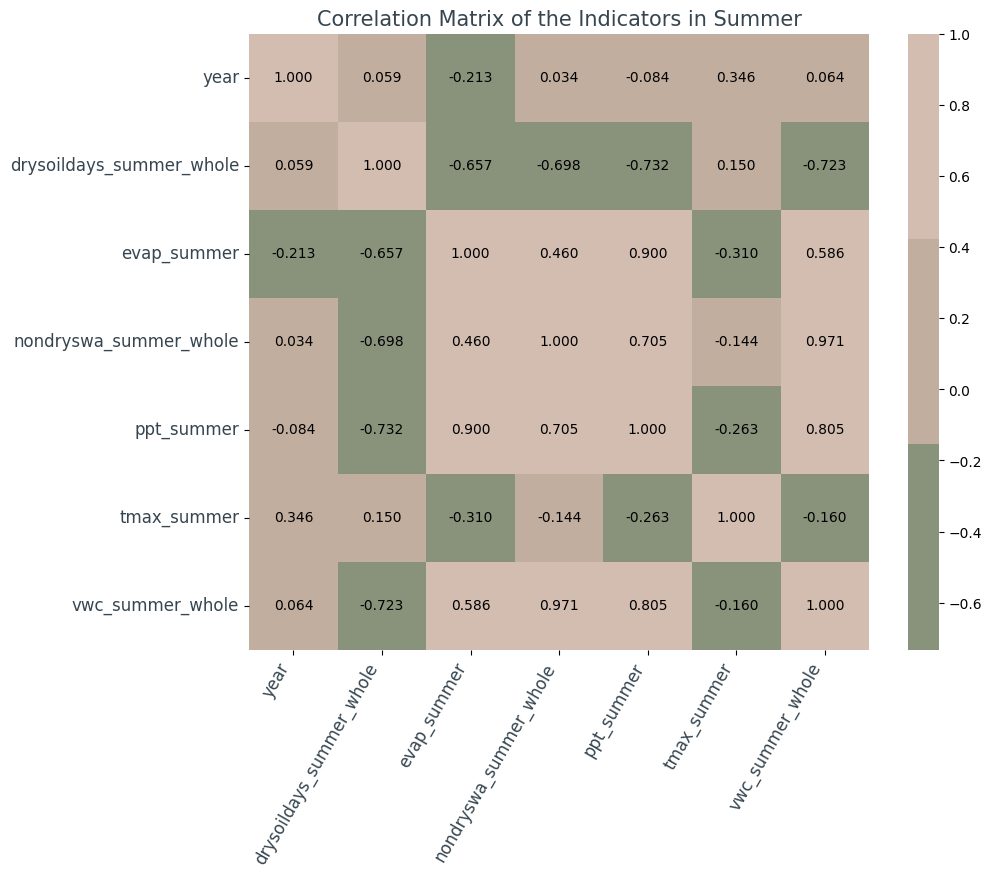

In [215]:
# plot a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(summer_copy.corr(), annot=True, cmap=sns.color_palette(["#89937C", "#C1AE9F", "#D3BDB0"], as_cmap=True), annot_kws={'size': 10, 'color': 'black'}, fmt='.3f')
plt.title('Correlation Matrix of the Indicators in Summer', fontsize=15, color='#36454F')
plt.xticks(rotation=60, ha='right', fontsize=12, color='#36454F')
plt.yticks(rotation=0, fontsize=12, color='#36454F')
plt.show()

In [216]:
summer_indicators = summer_copy.copy()
# drop the unnecessary columns
summer_indicators = summer_indicators.drop(columns=['nondryswa_summer_whole', 'tmax_summer', 'vwc_summer_whole'], axis=1)

# normalize the data
scaler2 = MinMaxScaler()
normalize_columns = ['drysoildays_summer_whole', 'evap_summer', 'ppt_summer']
summer_indicators = summer_indicators.copy()
summer_indicators[normalize_columns] = scaler2.fit_transform(summer_indicators[normalize_columns])
# summer_indicators

In [217]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_indicators, x='year', y=['drysoildays_summer_whole', 'evap_summer', 'ppt_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#EED21B", "#CA68C8", "#A7C6DA"])

fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
                                                      .replace('evap_summer', 'Evaporation')
                                                      .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [301]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_copy, x='year', y=['drysoildays_summer_whole', 'evap_summer', 'ppt_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#EED21B", "#CA68C8", "#A7C6DA"])

fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
                                                      .replace('evap_summer', 'Evaporation')
                                                      .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [218]:
# plot out relatiionship between VWC and evaporation and precipitation
# copy the data
summer_copy_2 = summer.copy()
# summer_copy_2

In [219]:
# drop the unnecessary columns
summer_copy_2 = summer_copy_2.drop(columns=['long', 'lat', 'rcp', 'drysoildays_summer_whole', 'nondryswa_summer_whole'], axis=1)
# drop the null values
summer_copy_2 = summer_copy_2.dropna().reset_index(drop=True)
# group by year
summer_copy_2 = summer_copy_2.groupby('year', as_index=False).mean().reset_index(drop=True)
# normalize the data
scaler = MinMaxScaler()
normalize_columns = ['evap_summer', 'ppt_summer', 'vwc_summer_whole', 'tmax_summer']
summer_copy_2[normalize_columns] = scaler.fit_transform(summer_copy_2[normalize_columns])
# round the columns
summer_copy_2 = summer_copy_2.round({'evap_summer': 3, 'ppt_summer': 3, 'tmax_summer': 3, 'vwc_summer_whole': 3})
# summer_copy_2

In [305]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_copy_2, x='year', y=['vwc_summer_whole', 'evap_summer', 'ppt_summer', 'tmax_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#000000", "#EED21B", "#CA68C8", "#A7C6DA"])

# fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
#                                                       .replace('evap_summer', 'Evaporation')
#                                                       .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [306]:
# save the data to csv file
summer_copy_2.to_csv('./data/cleaned_data/relationship_evap_ppt_vwc.csv')

#### Second Visualization

In [220]:
# spider chart of summer data
summer_copy_2 = summer.copy()

In [221]:
# drop unnecessary columns
summer_copy_2 = summer_copy_2.drop(['long', 'lat', 'rcp'], axis=1)

In [222]:
summer_mean = summer_copy_2.groupby(['year']).mean().reset_index()
# normalize each column
scaler = MinMaxScaler()
normalization = ['drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer']
summer_norm = summer_mean.copy()
summer_norm[normalization] = scaler.fit_transform(summer_norm[normalization])

In [223]:
# get rid of the first row
summer_norm = summer_norm.iloc[1:, :]

# save the normalized data to a csv file
summer_norm.to_csv('./data/cleaned_data/summer_data_normalized.csv', index=False)

In [224]:
# filter out 1981 and 2018 and 2024 data each
summer_1981 = summer_norm[summer_norm['year'] == 1981]
summer_2018 = summer_norm[summer_norm['year'] == 2018]
summer_2024 = summer_norm[summer_norm['year'] == 2024]

# round all the data
summer_1981 = summer_1981.round(3)
summer_2018 = summer_2018.round(3)
summer_2024 = summer_2024.round(3)

### Summer vs. Winter Dataset

In [311]:
# load the data
summer_winter = pd.read_csv('./data/cleaned_data/summer_winter_data.csv')
summer_winter.head()

,long,lat,year,rcp,ppt_annual,ppt_summer,ppt_winter,t_summer,t_winter,tmax_summer,tmin_winter
0,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
1,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
2,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
3,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
4,-110.0472,37.60413,1980,historical,NaN,NaN,NaN,NaN,NaN,NaN,-12.45


## Can we predict the data?

using the location, rcp, scenario, year, greenery data, and vwc data, can we predict the temperature data?

In [225]:
# drop the unnecessary columns
df2 = df.copy()
df2 = df2.drop(columns=['timeperiod'])

# fill the null values in all columns with the mean
fill_null = ['ppt_annual', 'drysoildays_summer_whole', 'evap_summer', 'extremeshorttermdrystress_summer_whole','frostdays_winter', 'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
df2.loc[:, fill_null] = df2[fill_null].fillna(df2[fill_null].mean())
df2 = df2.dropna()

# categorize the rcp, scenario column
df2['rcp'] = pd.factorize(df2['rcp'])[0]
df2['scenario'] = pd.factorize(df2['scenario'])[0]
# df2

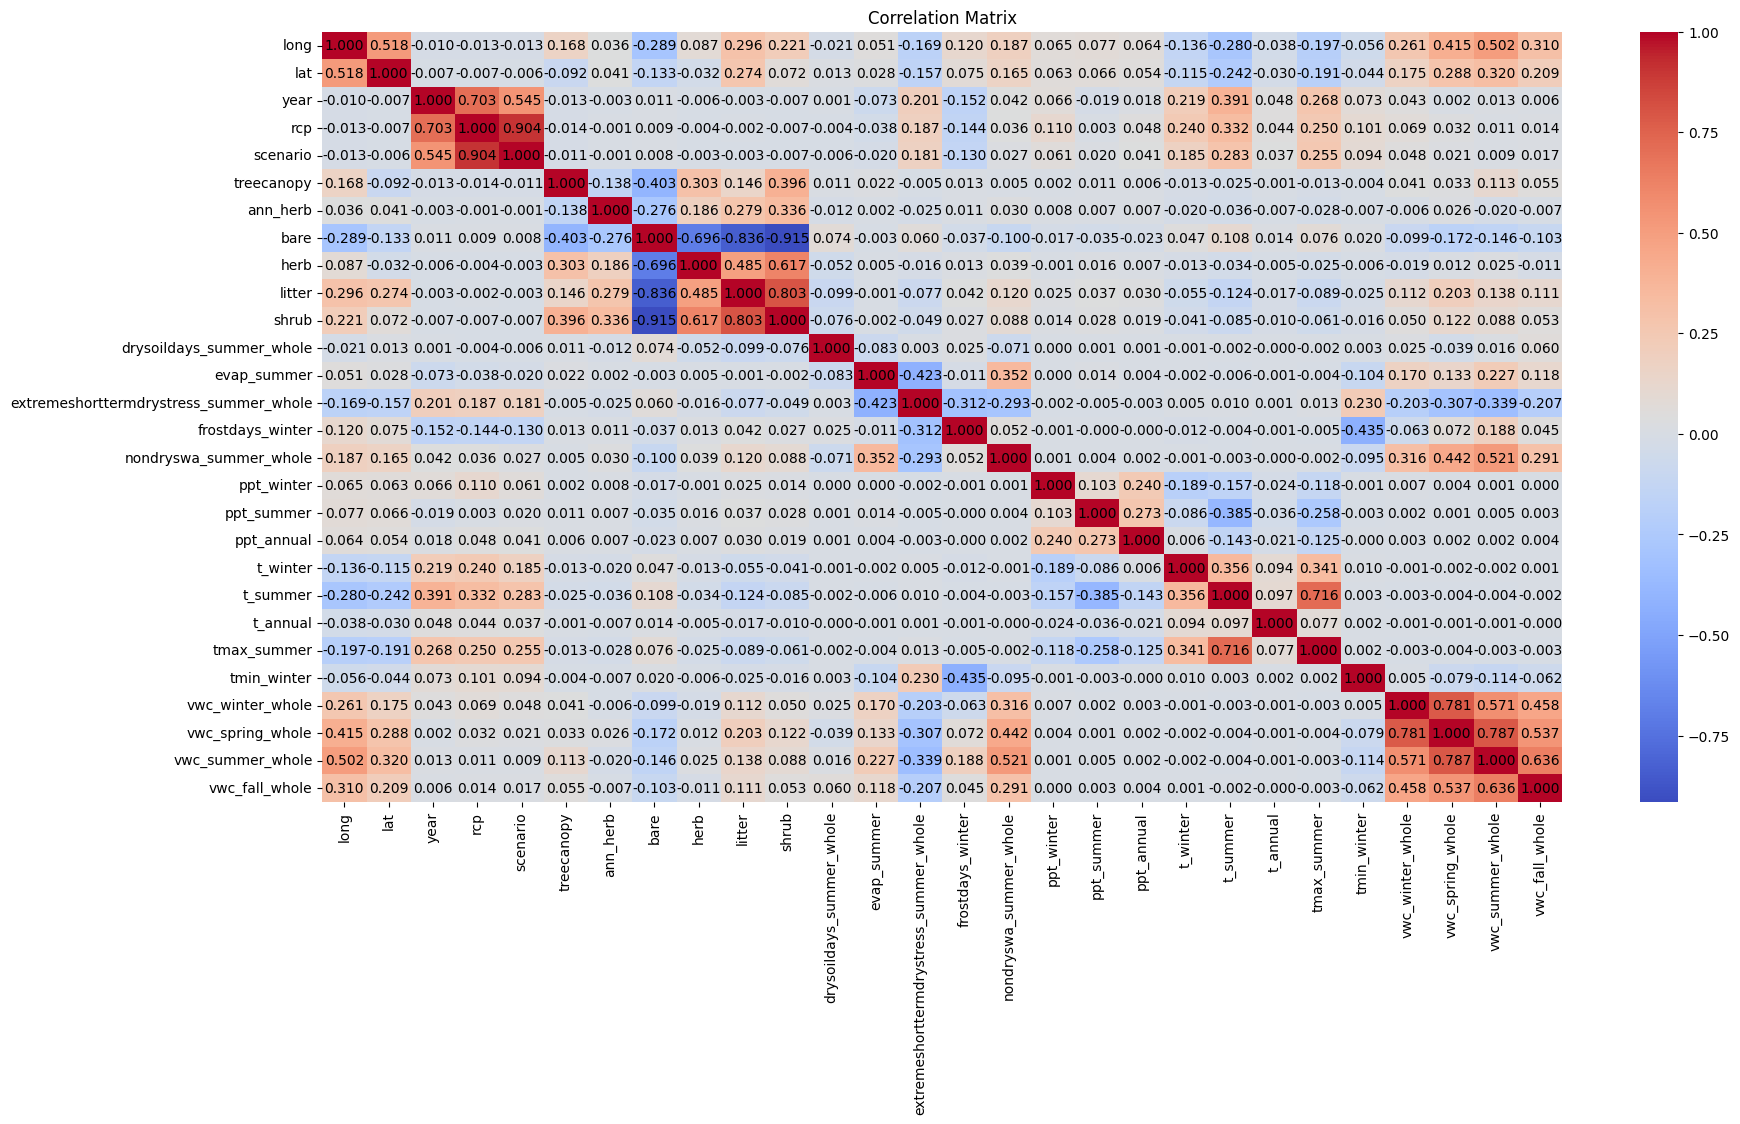

In [315]:
# plot a correlation matrix
plt.figure(figsize=(20, 10))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10, 'color': 'black'}, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [238]:
# select the only columns that I want
df2_selected = df2[['rcp', 'scenario', 't_annual', 'treecanopy', 'ann_herb', 'bare', 'herb', 'litter', 'shrub']]
# df2_selected

In [236]:
df3_selected = df2[['rcp', 'drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer', 'vwc_summer_whole']]

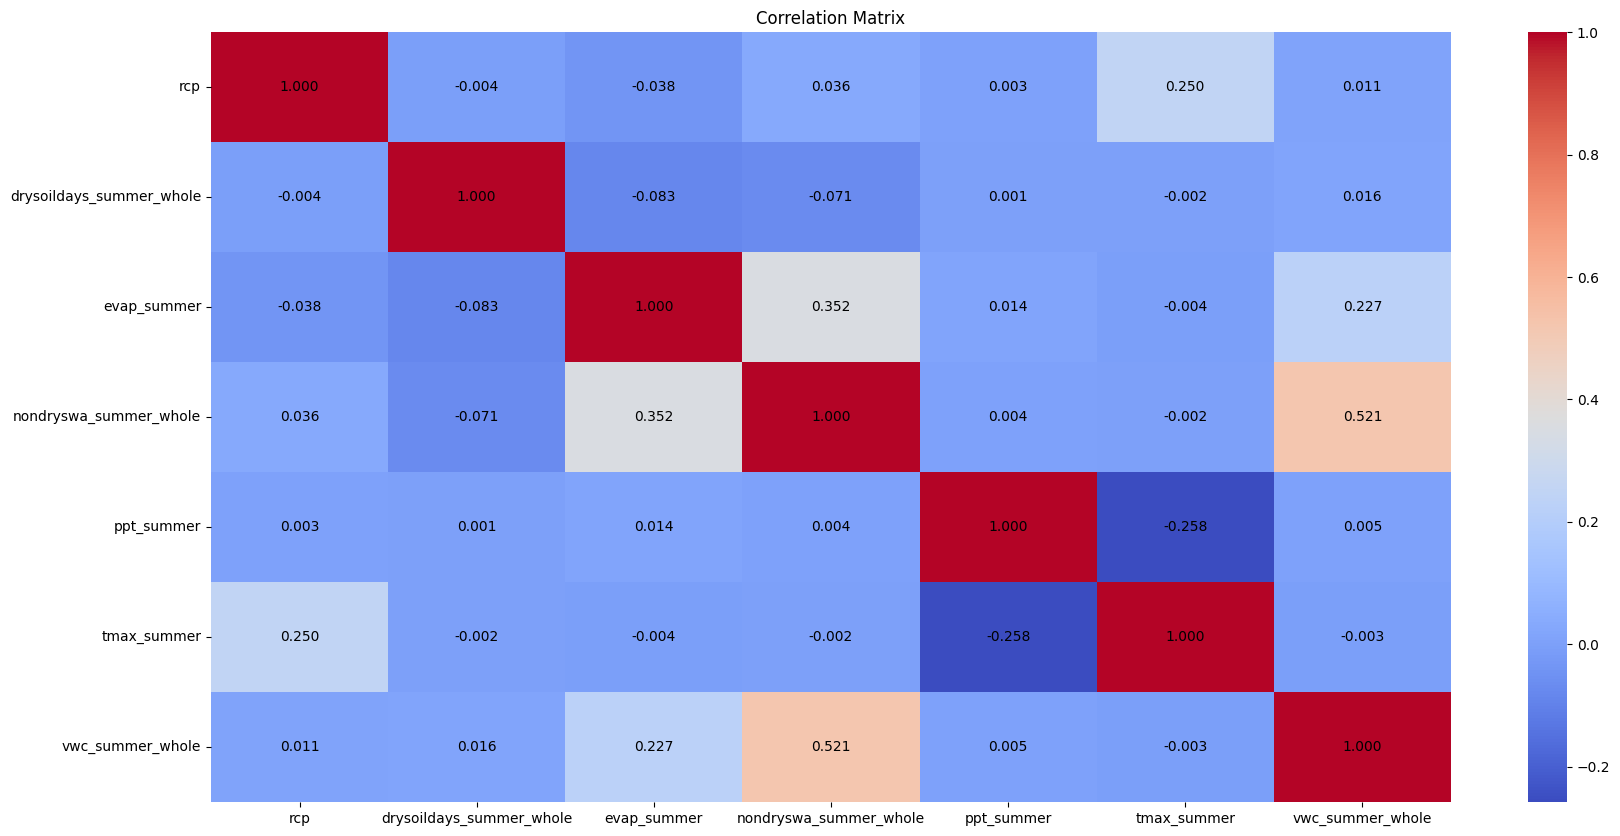

In [244]:
# plot out the corrleation matrix
plt.figure(figsize=(20, 10))
corr_matrix = df3_selected.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10, 'color': 'black'}, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [245]:
# round the values
corr_matrix = corr_matrix.round(3)

<Axes: >

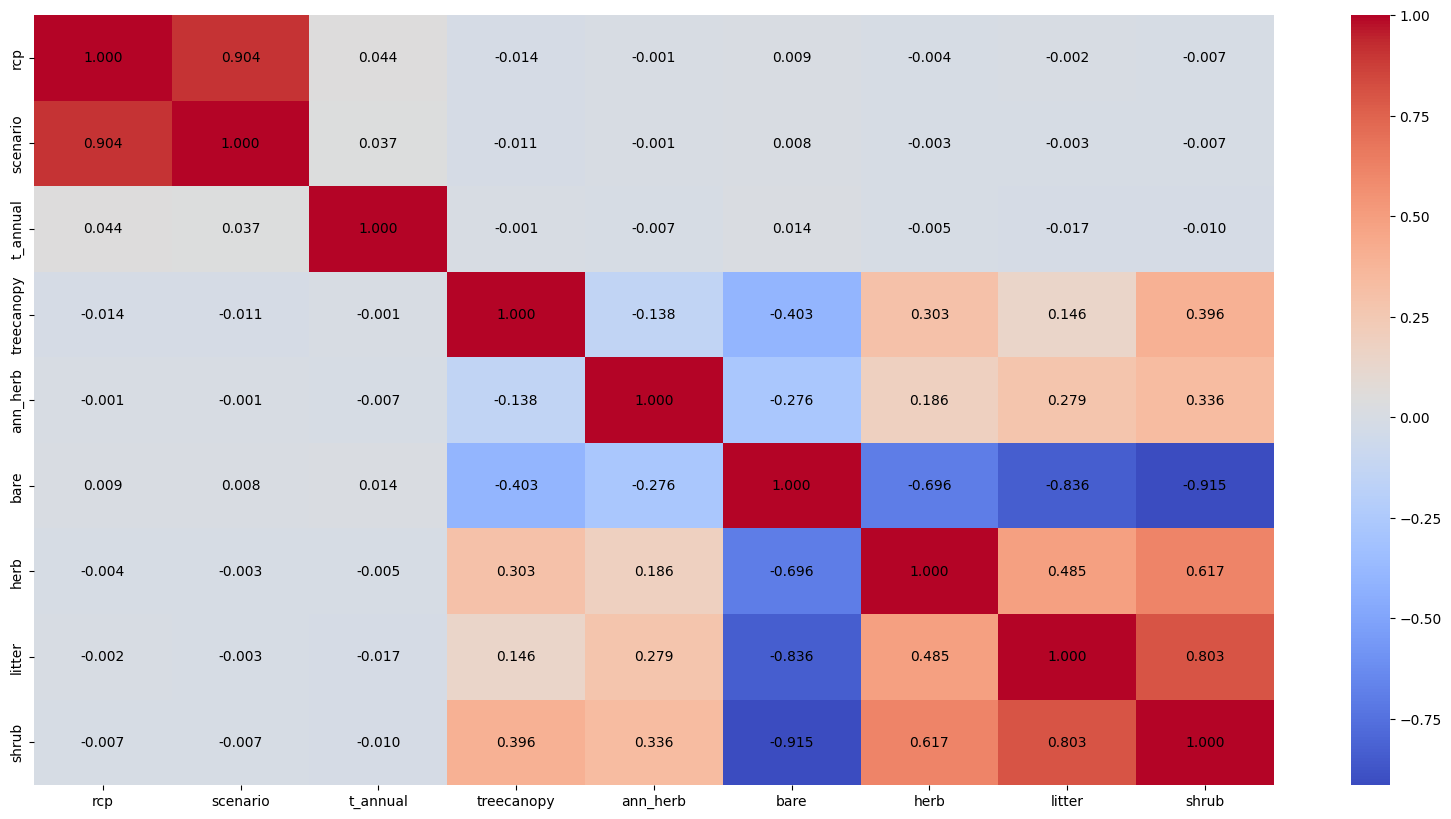

In [246]:
df2_selected = df2[['rcp', 'scenario', 't_annual', 'treecanopy', 'ann_herb', 'bare', 'herb', 'litter', 'shrub']]
# plot a corr matrix
plt.figure(figsize=(20, 10))
corr_matrix2 = df2_selected.corr()
sns.heatmap(corr_matrix2, annot=True, annot_kws={'size': 10, 'color': 'black'}, fmt='.3f', cmap='coolwarm')

In [248]:
corr_matrix2 = corr_matrix2.round(3)
corr_matrix2

,rcp,scenario,t_annual,treecanopy,ann_herb,bare,herb,litter,shrub
rcp,1.000,0.904,0.044,-0.014,-0.001,0.009,-0.004,-0.002,-0.007
scenario,0.904,1.000,0.037,-0.011,-0.001,0.008,-0.003,-0.003,-0.007
t_annual,0.044,0.037,1.000,-0.001,-0.007,0.014,-0.005,-0.017,-0.010
treecanopy,-0.014,-0.011,-0.001,1.000,-0.138,-0.403,0.303,0.146,0.396
ann_herb,-0.001,-0.001,-0.007,-0.138,1.000,-0.276,0.186,0.279,0.336
bare,0.009,0.008,0.014,-0.403,-0.276,1.000,-0.696,-0.836,-0.915
herb,-0.004,-0.003,-0.005,0.303,0.186,-0.696,1.000,0.485,0.617
litter,-0.002,-0.003,-0.017,0.146,0.279,-0.836,0.485,1.000,0.803
shrub,-0.007,-0.007,-0.010,0.396,0.336,-0.915,0.617,0.803,1.000


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['rcp'] = pd.factorize(df['rcp'])[0]
df['scenario'] = pd.factorize(df['scenario'])[0]
df = df.dropna()

features = ['long', 'lat', 'year', 'rcp', 'scenario', 'treecanopy', 'ann_herb', 'bare', 'herb', 'litter', 'ppt_annual', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
target_winter = 't_winter'
target_summer = 't_summer'
target_annual = 't_annual'

X = df[features]
y_winter = df[target_winter]
y_summer = df[target_summer]
y_annual = df[target_annual]

X_train, X_test, y_train_winter, y_test_winter = train_test_split(X, y_winter, test_size=0.2, random_state=42)
X_train, X_test, y_train_summer, y_test_summer = train_test_split(X, y_summer, test_size=0.2, random_state=42)
X_train, X_test, y_train_annual, y_test_annual = train_test_split(X, y_annual, test_size=0.2, random_state=42)

model_winter = LinearRegression()
model_winter.fit(X_train, y_train_winter)

model_summer = LinearRegression()
model_summer.fit(X_train, y_train_summer)

model_annual = LinearRegression()
model_annual.fit(X_train, y_train_annual)

y_pred_winter = model_winter.predict(X_test)
y_pred_summer = model_summer.predict(X_test)
y_pred_annual = model_annual.predict(X_test)

print("Winter Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_winter, y_pred_winter))
print("R2 Score:", r2_score(y_test_winter, y_pred_winter))

print("\nSummer Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_summer, y_pred_summer))
print("R2 Score:", r2_score(y_test_summer, y_pred_summer))

print("\nAnnual Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_annual, y_pred_annual))
print("R2 Score:", r2_score(y_test_annual, y_pred_annual))


Winter Temperature Prediction
Mean Squared Error: 2.035930086139957
R2 Score: 0.16768365655334394

Summer Temperature Prediction
Mean Squared Error: 0.6215809063140093
R2 Score: 0.5447162139854089

Annual Temperature Prediction
Mean Squared Error: 82.13705123403385
R2 Score: -0.10649154090043433
